<a href="https://colab.research.google.com/github/anpendyal/Convolutional-Neural-Networks-in-Breast-Cancer-Identification-Research-10th-Grade-/blob/main/ResNet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#give program access to google drive where the dataset is
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install library to get resnet34 because it is not included in keras
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-3cudfrag
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-3cudfrag
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 6.5 MB/s 
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20046 sha256=f718639ae67496b4148390b64996488e933f73d1a9c87a1375e81b5c5166a30b
  Stored in directory: /tmp/pip-ephem-wheel-cache-aww86ol4/wheels/0b/96/56/27b17c903efc647c51e4f364bfc20aa67f8d3dccad63c4fb4e
Successfully built image-classifiers


In [ ]:
# for tensorflow keras
from classification_models.tfkeras import Classifiers
Classifiers.models_names()

['resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'seresnet18',
 'seresnet34',
 'seresnet50',
 'seresnet101',
 'seresnet152',
 'seresnext50',
 'seresnext101',
 'senet154',
 'resnet50v2',
 'resnet101v2',
 'resnet152v2',
 'resnext50',
 'resnext101',
 'vgg16',
 'vgg19',
 'densenet121',
 'densenet169',
 'densenet201',
 'inceptionresnetv2',
 'inceptionv3',
 'xception',
 'nasnetlarge',
 'nasnetmobile',
 'mobilenet',
 'mobilenetv2']

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
#specify paths to dataset in google drive
import tensorflow as tf

train_path = "/content/drive/MyDrive/SSI 2021/Train Set"
val_path = "/content/drive/MyDrive/SSI 2021/Validation Set"
test_path = "/content/drive/MyDrive/SSI 2021/Test Set"

In [ ]:
#download ResNet34 and set up model
ResNet34, preprocess_input = Classifiers.get('resnet34')
resnet34 = ResNet34(include_top = False, input_shape=(224, 224, 3), weights='imagenet')

85532672/85521592 [==============================] - 4s 0us/step


In [ ]:
resnet34.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 224, 224, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']     

In [ ]:
for layer in resnet34.layers:
  layer.trainable = False

In [ ]:
from glob import glob
#training set
folders = glob("/content/drive/MyDrive/SSI 2021/Train Set/*")
len(folders)

2

In [ ]:
x = Flatten()(resnet34.output)

In [ ]:
prediction = Dense(len(folders), activation = "sigmoid")(x)

#create a model object
model = Model(inputs = resnet34.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 224, 224, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']   

In [ ]:
#binary crossentropy because the model is classifying the image as having cancer or not
#optimizer as adam because it is widely used
#metrics to use in calculation (precision and recall used to calculate f1 score)
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = [
               "accuracy",
                tf.keras.metrics.BinaryAccuracy(),
                tf.keras.metrics.AUC(from_logits=True),
                tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall(),
                tf.keras.metrics.TruePositives(),
                tf.keras.metrics.TrueNegatives(),
                tf.keras.metrics.FalsePositives(),
                tf.keras.metrics.FalseNegatives()
               ]
)

In [ ]:
#use image data generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#image augmentation -- come back to later
#train_datagen = ImageDataGenerator(rescale = 1./255,
#                                   shear_range = 0.2,
#                                   zoom_range = 0.2,
#                                   horizontal_flip = True)

#rescale rgb values from 0-255 to 0-1
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#same target size as initialized for images
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/SSI 2021/Train Set",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 21607 images belonging to 2 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory("/content/drive/MyDrive/SSI 2021/Validation Set",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 977 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/SSI 2021/Test Set",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 957 images belonging to 2 classes.


In [ ]:
from keras.callbacks import EarlyStopping

#fit the model
#early stopping for epochs

#https://keras.io/api/callbacks/early_stopping/
#https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ 
#use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

history = model.fit(
    training_set,
    validation_data = validation_set,
    epochs = 50,
    #steps_per_epoch = len(training_set),
    #validation_steps = len(validation_set),
    callbacks = [early_stopping]
)

#print number of epochs 
len(history.history['loss'])

Epoch 1/50
676/676 [==============================] - 3757s 6s/step - loss: 0.6858 - accuracy: 0.6181 - binary_accuracy: 0.6182 - auc: 0.6626 - precision: 0.6184 - recall: 0.6174 - true_positives: 13340.0000 - true_negatives: 13375.0000 - false_positives: 8232.0000 - false_negatives: 8267.0000 - val_loss: 0.8382 - val_accuracy: 0.4882 - val_binary_accuracy: 0.4882 - val_auc: 0.4949 - val_precision: 0.4882 - val_recall: 0.4882 - val_true_positives: 477.0000 - val_true_negatives: 477.0000 - val_false_positives: 500.0000 - val_false_negatives: 500.0000
Epoch 2/50
676/676 [==============================] - 55s 82ms/step - loss: 0.6286 - accuracy: 0.6649 - binary_accuracy: 0.6648 - auc: 0.7234 - precision: 0.6647 - recall: 0.6651 - true_positives: 14371.0000 - true_negatives: 14359.0000 - false_positives: 7248.0000 - false_negatives: 7236.0000 - val_loss: 0.8114 - val_accuracy: 0.5292 - val_binary_accuracy: 0.5292 - val_auc: 0.5442 - val_precision: 0.5291 - val_recall: 0.5312 - val_true_pos

17

In [ ]:
#evalute model with test set
from sklearn.metrics import roc_curve, auc
model.evaluate(test_set, verbose=1)

30/30 [==============================] - 282s 10s/step - loss: 0.8113 - accuracy: 0.6050 - binary_accuracy: 0.6050 - auc: 0.6900 - precision: 0.6050 - recall: 0.6050 - true_positives: 579.0000 - true_negatives: 579.0000 - false_positives: 378.0000 - false_negatives: 378.0000


[0.8113417625427246,
 0.6050156950950623,
 0.6050156950950623,
 0.6900308132171631,
 0.6050156950950623,
 0.6050156950950623,
 579.0,
 579.0,
 378.0,
 378.0]

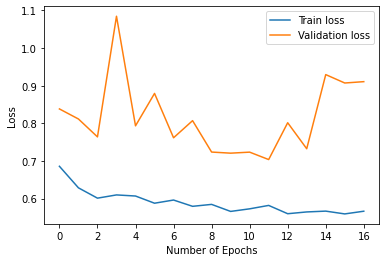

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot loss
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig("LossVal_loss")

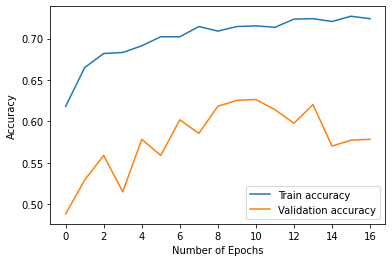

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot accuracy
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig("AccVal_acc")